In [3]:
# Common useful packages
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import copy
import spectral

# module that is useful for reloading packages
import importlib

# Scripts associated with the SML4SI textbook
import hyperspectral_gta_data as hsi_data
import scripts_M2 as sm2

# set the directory where data will be downloaded and accessed
# (This directory will be saved in a config file and used each time you use hyperspectral_gta_data, 
# so you don't need to run the 'set_data_dir' function every time you use hyperspectral_gta_data.)
hsi_data.set_data_dir('C:/spectral_data')

# 1. Download the data

In [4]:
# Here are the datasets available through the hyperspectral_gta_data package
hsi_data.available_datasets()

Available Images:
   WashingtonDC
   MicroscenePolymers
   DetectionImagery_CookeCity_RIT
   VegBaccharisUPWINS
   PaintDetectionUPWINS
   indian_pines
   pavia_centre
   pavia_university
   AVIRIS_Cuprite
   ENMAP_Cuprite
Available Spectral Libraries:
   GHISACONUS_2008_001_speclib
   Microscene_Polymers_Library
   UPWINS_4_16_2024
   Detection_Library_Cooke_City_RIT
   USGS_splib07b


## Download the hyperspectral image

In this case, we will be using a hyperspectral image from the RIT test over Cooke City, Montana. (https://dirsapps.cis.rit.edu/blindtest/)

In [ ]:
# Download spectral library:
hsi_data.download('UPWINS_4_16_2024')
fname = hsi_data.get_fname('UPWINS_4_16_2024')

# Download image:
hsi_data.download('VegBaccharisUPWINS')
fname = hsi_data.get_fname('VegBaccharisUPWINS')

Downloading...
From: https://drive.google.com/uc?id=11Zn-DxlVevtg-KAKnDRiPEVxnLYXDl5h
To: /Users/elarocco/Desktop/uva_phd_2024/remote_sensing/development/C:/spectral_data/spectral_libraries/UPWINS_4_16_2024.zip
100%|██████████| 6.88M/6.88M [00:00<00:00, 42.8MB/s]


File saved as: C:/spectral_data/spectral_libraries/UPWINS_4_16_2024/UPWINS_4_16_2024.hdr
File saved as: C:/spectral_data/spectral_libraries/UPWINS_4_16_2024/UPWINS_4_16_2024.sli
 
Available Files:
/Users/elarocco/Desktop/uva_phd_2024/remote_sensing/development/C:/spectral_data/spectral_libraries/UPWINS_4_16_2024/UPWINS_4_16_2024.sli
/Users/elarocco/Desktop/uva_phd_2024/remote_sensing/development/C:/spectral_data/spectral_libraries/UPWINS_4_16_2024/UPWINS_4_16_2024.hdr
Primary Image Filename:
C:/spectral_data/spectral_libraries/UPWINS_4_16_2024/UPWINS_4_16_2024.sli


# Hyperspectral Image

In [6]:
# load hyperspectral image
fname = './C/spectral_data/spectral_images/Vegetation_Baccharis_halmifolia_UPWINS/Morven_Baccharis_h_or_ref'
fname_hdr = './C/spectral_data/spectral_images/Vegetation_Baccharis_halmifolia_UPWINS/Morven_Baccharis_h_or_ref.hdr'

# Open the image and read into an array
im = spectral.envi.open(fname_hdr, fname)
wl_im = np.asarray(im.bands.centers)
# Load the image into memory
im.Arr = im.load()
imArr = im.Arr
print(f'Shape of ImArr = {imArr.shape}')
imList = np.reshape(imArr, (im.nrows*im.ncols, im.nbands))
print(f'Shape of imList = {imList.shape}')

Shape of ImArr = (300, 600, 343)
Shape of imList = (180000, 343)


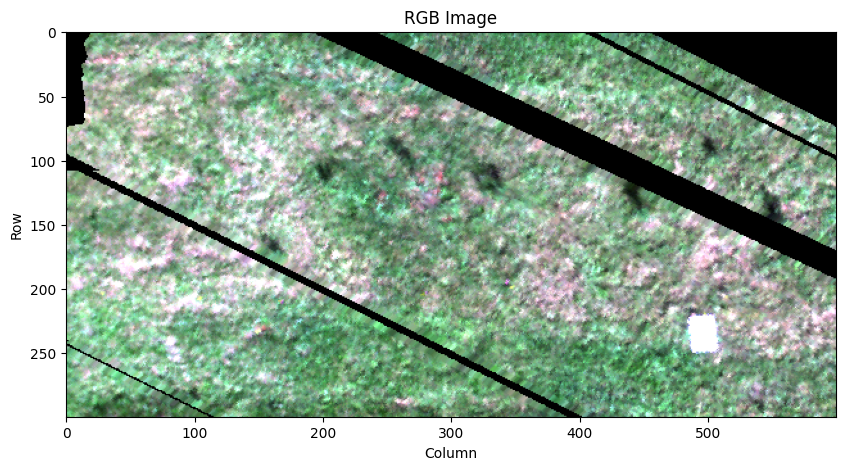

In [7]:
# display the image
sm2.display_RGB(imArr, wl_im, rotate=False)
plt.title('RGB Image');

# Spectral Library

In [8]:
# load spectral library
fname = './C/spectral_data/spectral_images/UPWINS_4_16_2024/UPWINS_4_16_2024.sli'
fname_hdr = './C/spectral_data/spectral_images/UPWINS_4_16_2024/UPWINS_4_16_2024.hdr'

# Open the image and read into an array
lib = spectral.envi.open(fname_hdr, fname)
# Load the image into memory
names = lib.names
spectra = lib.spectra
wl_lib = np.asarray(lib.bands.centers)

# ROI Ground Truth


In [17]:
import pickle
fname = './C/spectral_data/spectral_images/UPWINS_4_16_2024/UPWINS Baccharis Halimifolia.pkl'
with open(fname, 'rb') as f:
    roiData = pickle.load(f)

In [18]:
roiData.names

['Baccharis Halimifolia',
 'Flag',
 'Ribbon',
 'Background Healthy',
 'Background Scenesced']

In [11]:
roiData.colors

{'Baccharis Halimifolia': '#fa3232',
 'Flag': '#fdec02',
 'Ribbon': '#ff43ff',
 'Background Healthy': '#108304',
 'Background Scenesced': '#baae80'}

In [12]:
roiData.colors['Baccharis Halimifolia']

'#fa3232'

In [13]:
roiData.masks

{'Baccharis Halimifolia': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'Flag': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'Ribbon': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
  

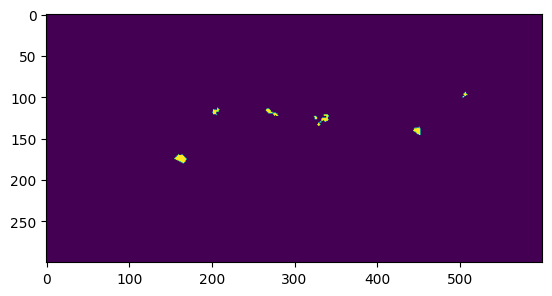

In [14]:
plt.imshow(roiData.masks['Baccharis Halimifolia'])

In [15]:
roiData.df

,Name,Color,Pixel_x,Pixel_y,399.096008,400.854004,402.612,404.369995,406.127991,407.885986,...,984.531006,986.289001,988.047974,989.80603,991.564026,993.322021,995.080017,996.838013,998.596008,1000.349976
0,Baccharis Halimifolia,#fa3232,175,155,0.0282,0.0368,0.0366,0.0344,0.0230,0.0356,...,0.4109,0.3889,0.4285,0.3314,0.3840,0.3716,0.3766,0.3416,0.3801,0.3947
1,Baccharis Halimifolia,#fa3232,174,156,0.0282,0.0368,0.0366,0.0344,0.0230,0.0356,...,0.4109,0.3889,0.4285,0.3314,0.3840,0.3716,0.3766,0.3416,0.3801,0.3947
2,Baccharis Halimifolia,#fa3232,175,156,0.0334,0.0369,0.0309,0.0318,0.0287,0.0324,...,0.4090,0.3906,0.4206,0.3356,0.3441,0.3810,0.3301,0.3485,0.3527,0.3558
3,Baccharis Halimifolia,#fa3232,173,157,0.0282,0.0368,0.0366,0.0344,0.0230,0.0356,...,0.4109,0.3889,0.4285,0.3314,0.3840,0.3716,0.3766,0.3416,0.3801,0.3947
4,Baccharis Halimifolia,#fa3232,174,157,0.0332,0.0369,0.0311,0.0319,0.0285,0.0325,...,0.4091,0.3905,0.4209,0.3354,0.3456,0.3806,0.3319,0.3482,0.3538,0.3573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Background Scenesced,#baae80,108,172,0.0547,0.0529,0.0493,0.0510,0.0494,0.0515,...,0.3388,0.3305,0.3511,0.3505,0.3243,0.3076,0.3674,0.3502,0.3996,0.3676
250,Background Scenesced,#baae80,104,173,0.0451,0.0459,0.0377,0.0331,0.0342,0.0394,...,0.3737,0.2927,0.3801,0.3776,0.3098,0.4160,0.2905,0.3880,0.3429,0.4168
251,Background Scenesced,#baae80,105,173,0.0460,0.0515,0.0426,0.0450,0.0347,0.0380,...,0.3536,0.3609,0.3262,0.2731,0.3314,0.3233,0.3458,0.3880,0.3494,0.4168
252,Background Scenesced,#baae80,106,173,0.0425,0.0466,0.0452,0.0468,0.0481,0.0403,...,0.2934,0.3556,0.2697,0.3226,0.3806,0.3279,0.3358,0.3361,0.3974,0.2698
